In [3]:
## install packages via conda
!conda install -c conda-forge geopy   
!conda install -c conda-forge geocoder 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [1]:
!conda install -c conda-forge folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    folium-0.10.0              |             py_0          59 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTAL

In [93]:
import numpy as np 

import seaborn as sns

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


## Exploring the dataset: read and clearn data, and apply descriptive statistics

Start to read data to be analyzed into a dataframe. In this notebook, air emission catogeries from 37 countries will be used as an example for the Capstone final assignment.
This dataframe contains all kinds of air pollutants emissions and their source regions from 2011 to 2017 in 37 countries. 

In [3]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_550188a7b7e64233a0129edbf5b84677 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='g5O8Oa-MzEcTIepY4GP9MhunwQoAPGoj6Is1vSRW8mb6',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_550188a7b7e64233a0129edbf5b84677.get_object(Bucket='dataanalysiswithpython-donotdelete-pr-ucpyby1m9dloos',Key='AEA_14082019093847519.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,COUNTRY,Country,POLLUTANT,Pollutant,ACTIVITY,Activity,MEASURE,Measure,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GHG,Greenhouse gases Total,IND-TOTAL,Total Industry ISIC rev. 4,TCO2,tonnes of CO2-equivalent,2011,2011,TONNE,Tonnes,0,Units,NaN,NaN,490983300,NaN,NaN
1,AUS,Australia,GHG,Greenhouse gases Total,IND-TOTAL,Total Industry ISIC rev. 4,TCO2,tonnes of CO2-equivalent,2012,2012,TONNE,Tonnes,0,Units,NaN,NaN,475160600,NaN,NaN
2,AUS,Australia,GHG,Greenhouse gases Total,IND-TOTAL,Total Industry ISIC rev. 4,TCO2,tonnes of CO2-equivalent,2013,2013,TONNE,Tonnes,0,Units,NaN,NaN,479144900,NaN,NaN
3,AUS,Australia,GHG,Greenhouse gases Total,IND-TOTAL,Total Industry ISIC rev. 4,TCO2,tonnes of CO2-equivalent,2014,2014,TONNE,Tonnes,0,Units,NaN,NaN,483354800,NaN,NaN
4,AUS,Australia,GHG,Greenhouse gases Total,IND-TOTAL,Total Industry ISIC rev. 4,TCO2,tonnes of CO2-equivalent,2015,2015,TONNE,Tonnes,0,Units,NaN,NaN,486292700,NaN,NaN


Data cleaning. Unnecessary columns are dropped.

In [4]:
print(df_data_1.columns)
df_data_2 = df_data_1[['Country', 'POLLUTANT', 'ACTIVITY', 'Year','Value']]
df_data_2.columns = ['country', 'pollutant', 'activity', 'year','value']
df_data_2.head()

Index(['COUNTRY', 'Country', 'POLLUTANT', 'Pollutant', 'ACTIVITY', 'Activity ',
       'MEASURE', 'Measure', 'YEA', 'Year', 'Unit Code', 'Unit',
       'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')


,country,pollutant,activity,year,value
0,Australia,GHG,IND-TOTAL,2011,490983300
1,Australia,GHG,IND-TOTAL,2012,475160600
2,Australia,GHG,IND-TOTAL,2013,479144900
3,Australia,GHG,IND-TOTAL,2014,483354800
4,Australia,GHG,IND-TOTAL,2015,486292700


Group the dataframe based on country, year and pollutant. Comibine source regions for the same pollutants and separate sources with ','. The total of amount of each pollutant from each country in different years is summarized.

In [5]:
df_1 = df_data_2.groupby(['country', 'year', 'pollutant'])['activity'].apply(lambda x: ', '.join(x.astype(str))).reset_index()
df_data = df_data_2.groupby(['year', 'country', 'pollutant']).sum().reset_index()
df_data['activities'] = df_1['activity']
df_data.head(10)

,year,country,pollutant,value,activities
0,2011,Australia,GHG,1749560300,"IND-TOTAL, A, B, C, C10-C12, C13-C15, C16-C18,..."
1,2011,Austria,ACG,1243390,"IND-TOTAL, A, B, C, C10-C12, C13-C15, C16-C18,..."
2,2011,Austria,CH4,36131775,"IND-TOTAL, A, B, C, C10-C12, C13-C15, C16-C18,..."
3,2011,Austria,CO,2816107,"IND-TOTAL, A, B, C, C10-C12, C13-C15, C16-C18,..."
4,2011,Austria,CO2,650233746,"IND-TOTAL, A, B, C, C10-C12, C13-C15, C16-C18,..."
5,2011,Austria,GHG,376583182,"H52, C22-C23, C22, A02, H53, D, M72, C33, HH04..."
6,2011,Austria,HFC,6647100,"IND-TOTAL, IND-TOTAL, A, A, A01, A01, A02, A02..."
7,2011,Austria,N2O,16799090,"IND-TOTAL, A, A01, A02, A03, B, C, C10-C12, C1..."
8,2011,Austria,NH3,947678,"IND-TOTAL, IND-TOTAL, A, A, A01, A01, A02, A02..."
9,2011,Austria,NMVOC,636920,"IND-TOTAL, A, A01, A02, A03, B, C, C10-C12, C1..."


The total emission of all pollutants together for each country are calulated and output as 'df_country'

In [6]:
df_sum = []
for country in df_data.country.unique():
    df_coun = df_data[df_data['country'] == country ]
    df_coun_sum = df_coun.groupby('year').sum(axis=0).reset_index()
    df_coun_sum = df_coun_sum[['value']]
    df_coun_sum.columns = [country]
    df_sum.append(df_coun_sum)
df_country = pd.concat(df_sum, axis=1).T
df_country.columns = np.arange(2011, 2018)
df_country.head()

,2011,2012,2013,2014,2015,2016,2017
Australia,1.749560e+09,1.701095e+09,1.717634e+09,1.730529e+09,1.739198e+09,NaN,NaN
Austria,1.098418e+09,9.923948e+08,1.119370e+09,1.064454e+09,1.131147e+09,1.105221e+09,1.069875e+09
Belgium,1.677021e+09,1.629567e+09,1.640869e+09,1.570333e+09,1.620684e+09,1.621602e+09,1.548004e+09
Bulgaria,8.081259e+08,7.444715e+08,6.732812e+08,7.100709e+08,7.501578e+08,7.182643e+08,7.383424e+08
Canada,2.919352e+09,2.942326e+09,2.984098e+09,2.989698e+09,2.988086e+09,2.944435e+09,NaN


In [7]:
## Fill NaN with mean emission values of all years in each country
df_country = df_country.T.fillna(df_country.T.mean()).T

Make a box plot to see the distribution of emissions from all countries

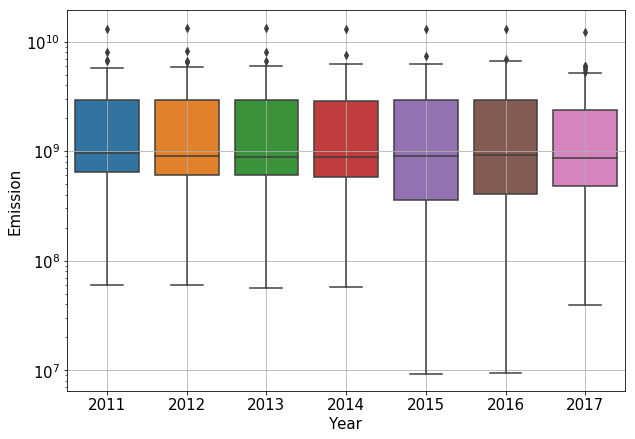

In [8]:
fig = plt.figure(figsize=(10,7))
ax = sns.boxplot(data=df_country)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Emission', fontsize=15)
ax.set_yscale('log')
ax.tick_params('both', labelsize=15)
ax.grid()

In [9]:
## descriptive statistics is performed on the total emission of each country
df_country.describe()

,2011,2012,2013,2014,2015,2016,2017
count,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01
mean,2.235990e+09,2.208704e+09,2.174118e+09,2.121531e+09,2.131688e+09,2.131082e+09,1.981440e+09
std,2.829582e+09,2.842756e+09,2.827113e+09,2.729962e+09,2.763352e+09,2.760768e+09,2.536788e+09
min,6.023800e+07,6.031242e+07,5.610338e+07,5.759133e+07,9.366202e+06,9.499536e+06,3.917536e+07
25%,6.440173e+08,6.097400e+08,6.032492e+08,5.756460e+08,3.564870e+08,4.081676e+08,4.800015e+08
50%,9.706982e+08,9.110923e+08,8.914742e+08,8.790245e+08,8.954791e+08,9.163692e+08,8.647294e+08
75%,2.919352e+09,2.924365e+09,2.920690e+09,2.844594e+09,2.944157e+09,2.944435e+09,2.394782e+09
max,1.306910e+10,1.319226e+10,1.340403e+10,1.288022e+10,1.296126e+10,1.301636e+10,1.222281e+10


Visualize the total emissions of each country from 2011 to 2017 on a bar plot.Now it cleatly shows that Germany produced the most pollutants among these countries 
and Malta emits the least

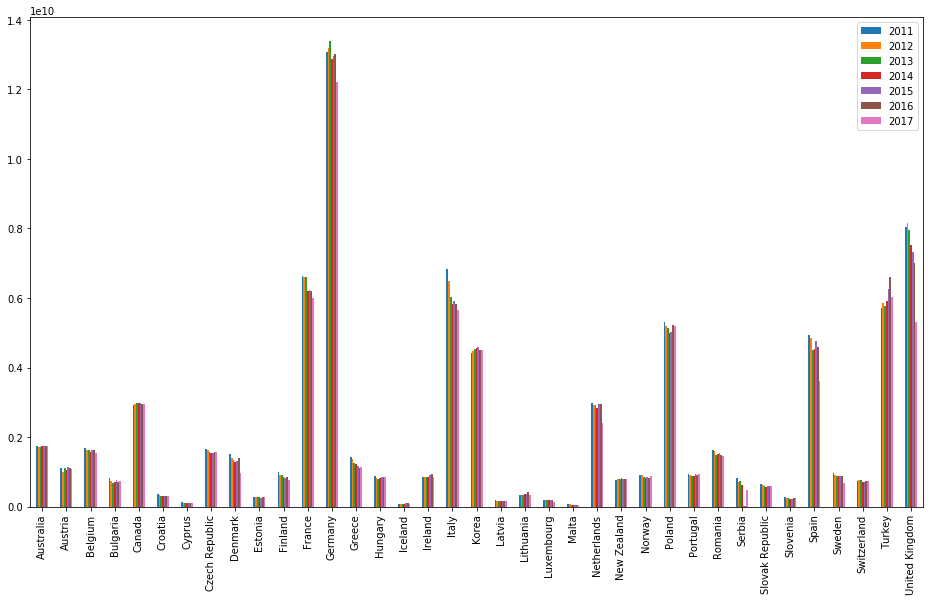

In [10]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
df_country.plot(kind='bar', ax=ax)

Get the geographical coordinates of all countries

In [12]:
countries = list(df_country.index)
#print(countries)
latitude = []
longitude = []
for country in countries:
    geolocator = Nominatim(user_agent="my_explorer")
    location = geolocator.geocode(country)
    print(location)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
df_country['latitude'] = latitude
df_country['longitude'] = longitude
df_country.head()

Australia
Österreich
België / Belgique / Belgien
Бългaрия
Canada
Hrvatska
Κύπρος
Česko
Danmark
Eesti
Finland
France
Deutschland
Ελλάδα
Magyarország
Ísland
Ireland
Italia
대한민국
Latvija
Lietuva
Lëtzebuerg
Malta
Nederland
New Zealand / Aotearoa
Norge, 263, Gamvik, Finnmark, 9775, Norge
RP
Portugal
România
Србија
Slovensko
Slovenija
España
Sverige
Schweiz/Suisse/Svizzera/Svizra
Türkiye
UK


,2011,2012,2013,2014,2015,2016,2017,latitude,longitude
Australia,1.749560e+09,1.701095e+09,1.717634e+09,1.730529e+09,1.739198e+09,1.727603e+09,1.727603e+09,-24.776109,134.755000
Austria,1.098418e+09,9.923948e+08,1.119370e+09,1.064454e+09,1.131147e+09,1.105221e+09,1.069875e+09,47.200034,13.199959
Belgium,1.677021e+09,1.629567e+09,1.640869e+09,1.570333e+09,1.620684e+09,1.621602e+09,1.548004e+09,50.640281,4.666715
Bulgaria,8.081259e+08,7.444715e+08,6.732812e+08,7.100709e+08,7.501578e+08,7.182643e+08,7.383424e+08,42.607397,25.485662
Canada,2.919352e+09,2.942326e+09,2.984098e+09,2.989698e+09,2.988086e+09,2.944435e+09,2.961332e+09,61.066692,-107.991707


Let's visualize all countries on a map

In [13]:
import folium
lat = df_country['latitude'].mean()
lon = df_country['longitude'].mean()
map_countries = folium.Map(location=[lat, lon], zoom_start=2)

for lat, lng, label in zip(df_country['latitude'], df_country['longitude'], df_country.index):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_countries)  
    
map_countries

## Clustering countries

In [14]:
from sklearn.preprocessing import StandardScaler


kclusters=4

values = df_country.values[:, :-2]
values = np.nan_to_num(values)
cluster_dataset = StandardScaler().fit_transform(values)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_dataset)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_

In [15]:
df_values = df_country.drop(['latitude', 'longitude'], axis=1)
df_country['mean'] = df_values.mean(axis=1)
df_country['labels']=labels
df_country.head()

,2011,2012,2013,2014,2015,2016,2017,latitude,longitude,mean,labels
Australia,1.749560e+09,1.701095e+09,1.717634e+09,1.730529e+09,1.739198e+09,1.727603e+09,1.727603e+09,-24.776109,134.755000,1.727603e+09,0
Austria,1.098418e+09,9.923948e+08,1.119370e+09,1.064454e+09,1.131147e+09,1.105221e+09,1.069875e+09,47.200034,13.199959,1.082983e+09,3
Belgium,1.677021e+09,1.629567e+09,1.640869e+09,1.570333e+09,1.620684e+09,1.621602e+09,1.548004e+09,50.640281,4.666715,1.615440e+09,0
Bulgaria,8.081259e+08,7.444715e+08,6.732812e+08,7.100709e+08,7.501578e+08,7.182643e+08,7.383424e+08,42.607397,25.485662,7.346734e+08,3
Canada,2.919352e+09,2.942326e+09,2.984098e+09,2.989698e+09,2.988086e+09,2.944435e+09,2.961332e+09,61.066692,-107.991707,2.961332e+09,0


In [16]:
map_clusters = folium.Map(location=[lat, lon], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, mean in zip(df_country['latitude'], df_country['longitude'], df_country.index, df_country['labels'], df_country['mean']):
    label = folium.Popup(str(poi) + '\n' + ' Cluster ' + str(cluster) + '\n' + str(mean), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Exploring emissions from one country and compare with some other country

In the cell below we read in countryinfo (area and population) from a .csv file to a dataframe

In [17]:
body = client_550188a7b7e64233a0129edbf5b84677.get_object(Bucket='dataanalysiswithpython-donotdelete-pr-ucpyby1m9dloos',Key='countryinfo.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3 = df_data_3.iloc[:,1:]
df_data_3.set_index('Country', inplace=True)
del df_data_3.index.name
df_data_3.head()

,Area,Population
Australia,7692024,23.70
Austria,83871,8.53
Belgium,30528,11.23
Bulgaria,110879,7.25
Canada,9984670,35.54


Here we will combine the emission dataframe with the countryinfo dataframe. After combination, the dataframe will be ordered by density and all years average emission

In [18]:
## combine the two dataframe
df = df_country.join(df_data_3) 

## the unit of density_pop is the number of persons per square kilometer
df['density_pop'] = 1.e+6*df['Population']/df['Area'] 

## the unit of density_air is emission amount per square kilometer
df['density_air'] = df['mean']/df['Area'] 
df.sort_values(['density_pop', 'density_air'], inplace=True, ascending=False) ## sort the dataframe by density_pop and density_air
df.head(10)

,2011,2012,2013,2014,2015,2016,2017,latitude,longitude,mean,labels,Area,Population,density_pop,density_air
Malta,6.023800e+07,6.031242e+07,5.610338e+07,5.759133e+07,5.426315e+07,5.186138e+07,3.917536e+07,35.888599,14.447691,5.422072e+07,3,316,0.42,1329.113924,171584.545660
Korea,4.429929e+09,4.460566e+09,4.535116e+09,4.569996e+09,4.585734e+09,4.516268e+09,4.516268e+09,36.558191,127.940856,4.516268e+09,1,100210,50.42,503.143399,45068.039838
Netherlands,2.984134e+09,2.924365e+09,2.920690e+09,2.844594e+09,2.944157e+09,2.948892e+09,2.394782e+09,52.247269,5.541223,2.851659e+09,0,41850,16.88,403.345281,68140.004769
Belgium,1.677021e+09,1.629567e+09,1.640869e+09,1.570333e+09,1.620684e+09,1.621602e+09,1.548004e+09,50.640281,4.666715,1.615440e+09,0,30528,11.23,367.859015,52916.663035
United Kingdom,8.032697e+09,8.159114e+09,7.951645e+09,7.520057e+09,7.326602e+09,6.997695e+09,5.315202e+09,54.702354,-3.276575,7.329002e+09,1,242900,64.11,263.935776,30172.917321
Germany,1.306910e+10,1.319226e+10,1.340403e+10,1.288022e+10,1.296126e+10,1.301636e+10,1.222281e+10,51.083420,10.423447,1.296372e+10,2,357114,80.78,226.202277,36301.352101
Luxembourg,1.818557e+08,1.789754e+08,1.790256e+08,1.777851e+08,1.878942e+08,1.845626e+08,1.441057e+08,49.815868,6.129675,1.763149e+08,3,2586,0.55,212.683681,68180.549663
Italy,6.830462e+09,6.479016e+09,6.017561e+09,5.825530e+09,5.925771e+09,5.839846e+09,5.644762e+09,42.638426,12.674297,6.080421e+09,1,301336,60.77,201.668569,20178.210577
Switzerland,7.352514e+08,7.548542e+08,7.676034e+08,7.195070e+08,7.194578e+08,7.276524e+08,7.373877e+08,46.798562,8.231974,7.373877e+08,3,41284,8.18,198.139715,17861.343523
Czech Republic,1.656907e+09,1.625600e+09,1.560737e+09,1.550478e+09,1.552862e+09,1.579151e+09,1.559597e+09,49.816700,15.474954,1.583619e+09,0,78865,10.52,133.392506,20080.121493


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


<Figure size 720x504 with 0 Axes>

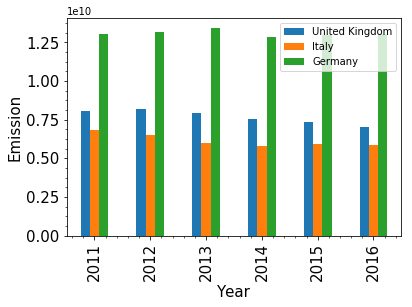

In [19]:
### UK has slightly larger population and it also produce more ait pollutant. 
fig = plt.figure(figsize=(10,7))
df_de_uk = df.ix[['United Kingdom', 'Italy', 'Germany'], 0:6].T
df_de_uk.plot(kind='bar')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Emission',fontsize=15)
plt.tick_params('both', labelsize=15)
plt.minorticks_on()

Let's see if the mean emission is linearly related to population or area of the country

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = df[['Area']]
y = df['mean']
lm.fit(x,y)
yhat = lm.predict(x)
print(lm.intercept_, lm.coef_)

lm0 = LinearRegression()
X = df[['Population']]
Y = df['mean']
lm0.fit(X,Y)
Yhat = lm0.predict(X)
print(lm0.intercept_, lm0.coef_)
df['yhat_area'] = yhat
df['yhat_pop'] = Yhat 

2070769786.2900004 [108.3434228]
15231950.706111431 [1.09057807e+08]


/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


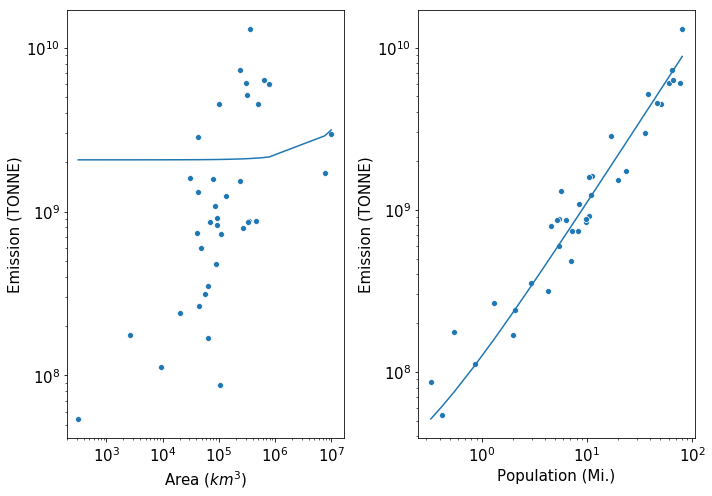

In [21]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(121)
sns.scatterplot(x='Area', y='mean', data=df)
sns.lineplot(x='Area', y='yhat_area', data=df)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Area ($km^{3}$)', fontsize=15)
ax.set_ylabel('Emission (TONNE)',fontsize=15)
ax.tick_params('both', labelsize=15)
ax.set_xlim(xmin=200)
ax1 = fig.add_subplot(122)
sns.scatterplot(x='Population', y='mean', data=df)
sns.lineplot(x='Population', y='yhat_pop', data=df)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Population (Mi.)', fontsize=15)
ax1.set_ylabel('Emission (TONNE)',fontsize=15)
ax1.tick_params('both', labelsize=15)
plt.tight_layout()

Regression plots can also be used to visualize the fit of the model.

This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

As we can see that Population is more positively correlated with the incease of emission.

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


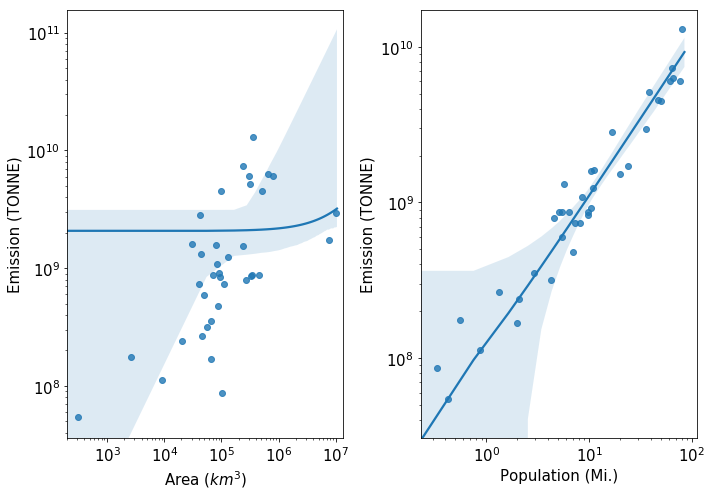

In [22]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(121)
sns.regplot(x='Area', y='mean', data=df)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Area ($km^{3}$)', fontsize=15)
ax.set_ylabel('Emission (TONNE)',fontsize=15)
ax.tick_params('both', labelsize=15)
ax.set_xlim(xmin=200)
ax1 = fig.add_subplot(122)
sns.regplot(x='Population', y='mean', data=df)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Population (Mi.)', fontsize=15)
ax1.set_ylabel('Emission (TONNE)',fontsize=15)
ax1.tick_params('both', labelsize=15)
plt.tight_layout()

Define a function to obtain emission categories and corresponding emission values of specific country. Missing values in each category will be filled with average value from other years. Total emissions of all categories are summerized in the dataframe as 'SUM'.

In [23]:
def get_cat_country(country):
    dataf = df_data[df_data['country']==country]
    df_de_emission = dataf[['year', 'pollutant', 'value']]
    df_de_emission = df_de_emission.groupby(['pollutant']).apply(lambda x: x.sort_values('year'))
    df_de_emission.drop('pollutant', axis=1, inplace=True)
    species = df_de_emission.index.get_level_values(0).unique()
    data = {}
    for item in species:
        data.update({item: list(df_de_emission.loc[item, 'value'])})
    
    df_species = pd.DataFrame({key:pd.Series(value) for key, value in data.items()})
    df_species.fillna(df_species.mean(), inplace=True)
    if len(df_species) == 7:
        df_species.index = range(2011, 2018)
    elif len(df_species) == 6: 
        df_species.index = range(2011, 2017)
    elif len(df_species) == 5: 
        df_species.index = range(2011, 2016)    
    df_species['SUM'] = df_species.sum(axis = 1)
    return df_species

Here we take Germany as an example to explore its emission categories

In [24]:
df_de = get_cat_country('Germany')
df_de.iloc[:, :-1].T.head()


,2011,2012,2013,2014,2015,2016,2017
ACG,1.552687e+07,1.572130e+07,1.588733e+07,1.551055e+07,1.478483e+07,1.446262e+07,1.531558e+07
CH4,2.883760e+08,2.905319e+08,2.873991e+08,2.823818e+08,2.807387e+08,2.748154e+08,2.728180e+08
CO,1.819387e+07,1.647006e+07,1.624774e+07,1.578641e+07,1.629494e+07,1.635686e+07,1.655831e+07
CO2,7.966571e+09,8.050624e+09,8.192090e+09,7.846972e+09,7.900863e+09,7.951659e+09,7.490093e+09
GHG,4.450328e+09,4.490843e+09,4.561277e+09,4.387100e+09,4.415268e+09,4.430667e+09,4.196419e+09


Use pie chart to show the the percentage of each categtory to total emission. It directly reveals that CO2 and GHG (Green House Gas) are the two dominant emission categories.

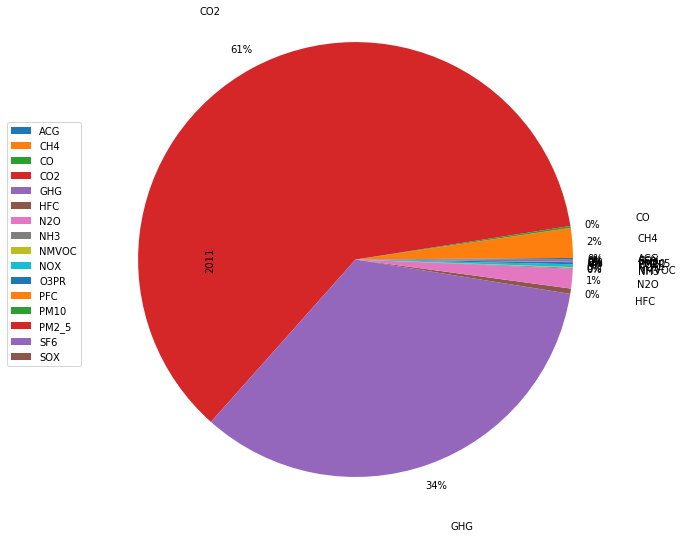

In [25]:
df_de.iloc[:, :-1].T.plot.pie(y=2011, figsize=(5, 5), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3, radius=2)
plt.legend(bbox_to_anchor=(-0.8,1.025), loc="upper left")

Use the function regplot in the seaborn library to determine if the feature GHG is negatively or positively correlated with the total emission 'SUM'. Meanwhile we can use this linear regression to predict next years' total emission of air pollutants based on GHG value.

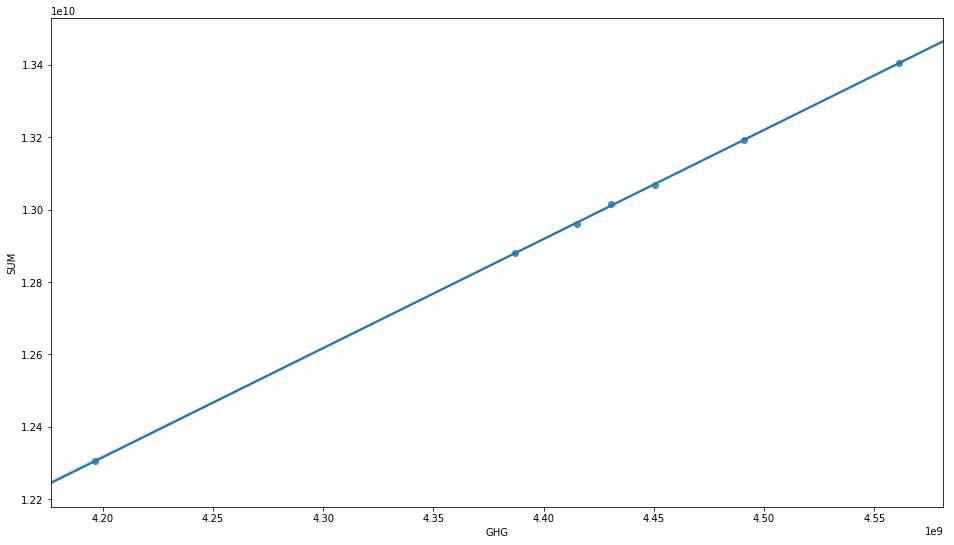

In [26]:
fig = plt.figure(figsize=(16,9)) 
sns.regplot(x="GHG", y="SUM", data=df_de)

We can use the Pandas method corr() to find the feature other than 'SUM' that is most correlated with 'SUM'.
From here we can see relations of different categories with total emissions. 

In [27]:
df_de.corr()['SUM'].sort_values()

SF6     -0.745268
HFC     -0.544164
PFC     -0.356505
NH3     -0.208065
N2O     -0.165079
CO       0.044754
SOX      0.258098
ACG      0.291316
NMVOC    0.323651
PM2_5    0.331732
PM10     0.363508
NOX      0.363794
CH4      0.758954
O3PR     0.890270
CO2      0.999503
GHG      0.999970
SUM      1.000000
Name: SUM, dtype: float64

We can see from the plot that total emission in Germany is decreasing. However, Germany may emit slightly more in 2018 than in 2017 according to the trend.

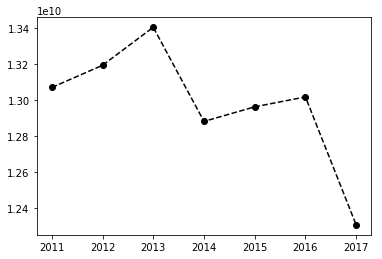

In [28]:
df_de.reset_index(inplace=True)
plt.plot(df_de['index'], df_de['SUM'], color='k', marker='o', linestyle='--')

Let's compare countries in Cluster 1 to see how the total emission changed from 2011 to 2017.

In [29]:
df_cluster1 = df_country[df_country['labels'] == 1]
df_cluster1.index

Index(['France', 'Italy', 'Korea', 'Poland', 'Spain', 'Turkey',
       'United Kingdom'],
      dtype='object')

Spain and UK showed much fast drop between 2016 and 2017. Only minor decreases appeared in other countries emission values. Turkey was steadily increasing air pollutant emission.

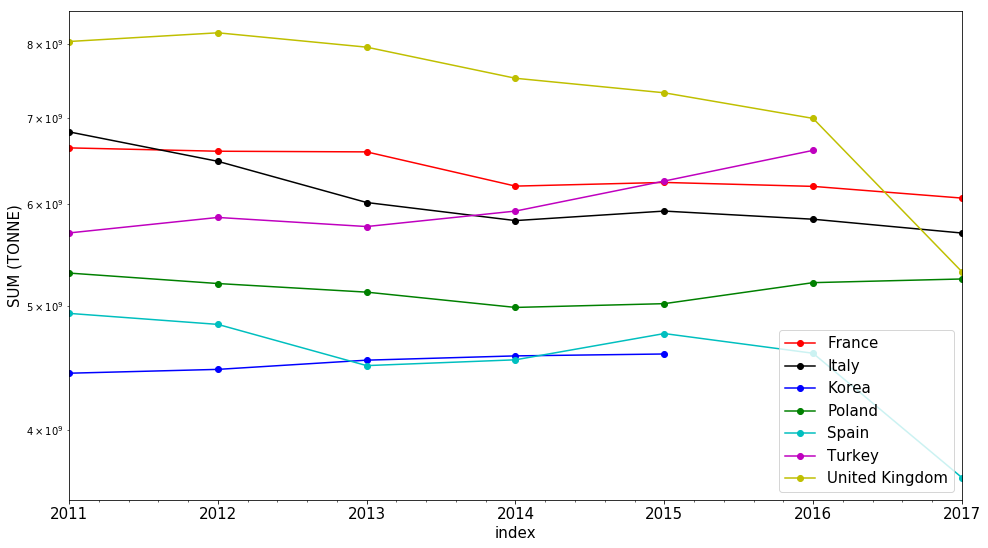

In [88]:
color_s=['r', 'k', 'b', 'g', 'c', 'm', 'y']
fig = plt.figure(figsize=(16,9)) 
ax0 = fig.add_subplot(111)
ax0.set(yscale="log")
ax0.grid()
ax0.set_xlabel('year', fontsize=15)
ax0.set_ylabel('SUM (TONNE)', fontsize=15)
ax0.minorticks_on()
ax0.tick_params('both', labelsize=15)
for i, country in enumerate(list(df_cluster1.index)):
    df_cy = get_cat_country(country)
    df_cy.reset_index(inplace=True)
    df_cy.plot(x='index', y='SUM', marker='o', color=color_s[i], ax=ax0)

plt.legend(df_cluster1.index, fontsize=15)

Due to that the data set is not large enough to split into train and test data set, Further model calculation and evaluation are not applied here. However, the trend of emission values can still be predicted based on data collected from 2011 to 2017, especially from the emission of CO2, GHG and the positive correlation between emission and population. 

Besides, by separating these 37 countries into 4 clusters, it's easier to judge whether a country is emiting a samll, medium, large or extremely large amount of air pollutants from the list. For example, Although the population density in Germany is around 15% larger than Italy, its average emission boubled that in Italy. Germany contributed the most air pollutants among all countries in the past 7 years, which might make it the prior target to reduce emission.  

### Exploring neibourhood

Now I would like to share this knowledge with pupils and high school students in Cologne city, Let's focus on the school near the central station.
At first we will retrieve the geolocation of the central station.

In [110]:
address = 'central station, Cologne'

geolocator = Nominatim(user_agent="my_application'*")
loca = geolocator.geocode(address)
print(loca)
lat_cgn = loca.latitude
long_cgn = loca.longitude
print('The geograpical coordinate of Mülheim Coglone are {}, {}.'.format(lat_cgn, long_cgn))

Köln, Regierungsbezirk Köln, Nordrhein-Westfalen, Deutschland
The geograpical coordinate of Mülheim Coglone are 50.938361, 6.959974.


Define Foursquare Credentials and Version

In [111]:
CLIENT_ID = 'TOECL5HIGNNDKJQ51QVQ1M0AME0TCHZQYZYI54PJ1MZUWVYV' # your Foursquare ID
CLIENT_SECRET = 'HDVIZNYXQGA5U0BHKRDYVRMAJGVHXZAG0LZTZS5Y0KRYAFRI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TOECL5HIGNNDKJQ51QVQ1M0AME0TCHZQYZYI54PJ1MZUWVYV
CLIENT_SECRET:HDVIZNYXQGA5U0BHKRDYVRMAJGVHXZAG0LZTZS5Y0KRYAFRI


Now, let's get the top 100 venues that are in Mühelm within a radius of 5 km.
First, let's create the GET request URL. Name your URL **url**.

In [112]:
search_query = 'Schule'

radius = 5000
LIMIT = 100 
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_cgn, long_cgn, VERSION, search_query, radius, LIMIT)
url

Schule .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=TOECL5HIGNNDKJQ51QVQ1M0AME0TCHZQYZYI54PJ1MZUWVYV&client_secret=HDVIZNYXQGA5U0BHKRDYVRMAJGVHXZAG0LZTZS5Y0KRYAFRI&ll=50.938361,6.959974&v=20180605&query=Schule&radius=5000&limit=100'

Send the GET request and examine the resutls

In [113]:
results = requests.get(url).json()
venues = results['response']['venues']
venues

[{'id': '5167c10de4b0e8420d8653f8',
  'name': 'Célestin-Freinet-Schule',
  'location': {'address': 'Dagobertstr. 79',
   'lat': 50.94834705513646,
   'lng': 6.962591968990488,
   'labeledLatLngs': [{'label': 'display',
     'lat': 50.94834705513646,
     'lng': 6.962591968990488}],
   'distance': 1126,
   'postalCode': '50668',
   'cc': 'DE',
   'city': 'Köln',
   'state': 'Nordrhein-Westfalen',
   'country': 'Deutschland',
   'formattedAddress': ['Dagobertstr. 79', '50668 Köln', 'Deutschland']},
  'categories': [{'id': '4f4533804b9074f6e4fb0105',
    'name': 'Elementary School',
    'pluralName': 'Elementary Schools',
    'shortName': 'Elementary School',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1566206253',
  'hasPerk': False},
 {'id': '4c0531b49a7920a18e42d279',
  'name': 'Kaiserin Augusta Schule',
  'location': {'address': 'Georgsplatz 10',
   'lat': 50.93166586986782,
   'lng

In [114]:
nearby_venues = json_normalize(venues) # flatten JSON
nearby_venues.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",False,5167c10de4b0e8420d8653f8,Dagobertstr. 79,DE,Köln,Deutschland,NaN,1126,"[Dagobertstr. 79, 50668 Köln, Deutschland]","[{'label': 'display', 'lat': 50.94834705513646...",50.948347,6.962592,50668,Nordrhein-Westfalen,Célestin-Freinet-Schule,v-1566206253,NaN
1,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4c0531b49a7920a18e42d279,Georgsplatz 10,DE,Köln,Deutschland,NaN,756,"[Georgsplatz 10, 50676 Köln, Deutschland]","[{'label': 'display', 'lat': 50.93166586986782...",50.931666,6.958150,50676,Nordrhein-Westfalen,Kaiserin Augusta Schule,v-1566206253,NaN
2,"[{'id': '4bf58dd8d48988d1e7941735', 'name': 'P...",False,5055e745e4b0d070fd18b67b,NaN,DE,Köln,Deutschland,NaN,3213,"[Köln, Deutschland]","[{'label': 'display', 'lat': 50.965615, 'lng':...",50.965615,6.975080,NaN,Nordrhein-Westfalen,Spielplatz Otfried-Preußler-Schule,v-1566206253,NaN
3,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",False,5ac5097ebd897e2f561af1d4,Neusser Str. 81,DE,Köln,Deutschland,NaN,1833,"[Neusser Str. 81, 50670 Köln, Deutschland]","[{'label': 'display', 'lat': 50.954697, 'lng':...",50.954697,6.956593,50670,Nordrhein-Westfalen,Bali-Dojang Kampfkunst Schule,v-1566206253,NaN
4,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",False,4e282fd2d4c0e361d9db4067,Auguststr. 1,DE,Köln,Deutschland,NaN,2473,"[Auguststr. 1, 50733 Köln, Deutschland]","[{'label': 'display', 'lat': 50.95994, 'lng': ...",50.959940,6.951573,50733,Nordrhein-Westfalen,Schule Auguststraße,v-1566206253,NaN


From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [115]:
print(list(col for col in nearby_venues.columns if col.startswith('location.')))
filtered_columns = ['name', 'categories'] + [col for col in nearby_venues.columns if col.startswith('location.')] + ['id']
dataframe_filtered = nearby_venues.loc[:, filtered_columns]

['location.address', 'location.cc', 'location.city', 'location.country', 'location.crossStreet', 'location.distance', 'location.formattedAddress', 'location.labeledLatLngs', 'location.lat', 'location.lng', 'location.postalCode', 'location.state']


In [116]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Célestin-Freinet-Schule,Elementary School,Dagobertstr. 79,DE,Köln,Deutschland,NaN,1126,"[Dagobertstr. 79, 50668 Köln, Deutschland]","[{'label': 'display', 'lat': 50.94834705513646...",50.948347,6.962592,50668,Nordrhein-Westfalen,5167c10de4b0e8420d8653f8
1,Kaiserin Augusta Schule,High School,Georgsplatz 10,DE,Köln,Deutschland,NaN,756,"[Georgsplatz 10, 50676 Köln, Deutschland]","[{'label': 'display', 'lat': 50.93166586986782...",50.931666,6.958150,50676,Nordrhein-Westfalen,4c0531b49a7920a18e42d279
2,Spielplatz Otfried-Preußler-Schule,Playground,NaN,DE,Köln,Deutschland,NaN,3213,"[Köln, Deutschland]","[{'label': 'display', 'lat': 50.965615, 'lng':...",50.965615,6.975080,NaN,Nordrhein-Westfalen,5055e745e4b0d070fd18b67b
3,Bali-Dojang Kampfkunst Schule,Martial Arts Dojo,Neusser Str. 81,DE,Köln,Deutschland,NaN,1833,"[Neusser Str. 81, 50670 Köln, Deutschland]","[{'label': 'display', 'lat': 50.954697, 'lng':...",50.954697,6.956593,50670,Nordrhein-Westfalen,5ac5097ebd897e2f561af1d4
4,Schule Auguststraße,Elementary School,Auguststr. 1,DE,Köln,Deutschland,NaN,2473,"[Auguststr. 1, 50733 Köln, Deutschland]","[{'label': 'display', 'lat': 50.95994, 'lng': ...",50.959940,6.951573,50733,Nordrhein-Westfalen,4e282fd2d4c0e361d9db4067
5,Johann-Christoph-Winters-Schule,School,Amsterdamer Str. 59,DE,Köln,Deutschland,NaN,2754,"[Amsterdamer Str. 59, 50735 Köln, Deutschland]","[{'label': 'display', 'lat': 50.96276473999023...",50.962765,6.966445,50735,Nordrhein-Westfalen,555059dc498e2dcf9033cd21
6,Paul Maar Schule,None,NaN,DE,Köln,Deutschland,NaN,521,"[Köln, Deutschland]","[{'label': 'display', 'lat': 50.934038, 'lng':...",50.934038,6.957092,NaN,Nordrhein-Westfalen,4d5ba8f8590b224bae27986d
7,Königin-Luise-Schule,High School,Alte Wallgasse 10,DE,Köln,Deutschland,Palmstraße,1208,"[Alte Wallgasse 10 (Palmstraße), 50672 Köln, D...","[{'label': 'display', 'lat': 50.93948902184421...",50.939489,6.942840,50672,Nordrhein-Westfalen,4ca0f20f8afca0931f2d1716
8,Maria-Sybilla-Merian-Schule,School,Cäsarstr. 21,DE,Köln,Deutschland,NaN,3460,"[Cäsarstr. 21, 50968 Köln, Deutschland]","[{'label': 'display', 'lat': 50.90756581475310...",50.907566,6.966695,50968,Nordrhein-Westfalen,4e213ec6922e11c006646740
9,Wilhelm-Leyendecker-Schule,School,Leyendeckerstr. 20,DE,Köln,Deutschland,NaN,3907,"[Leyendeckerstr. 20, 50825 Köln, Deutschland]","[{'label': 'display', 'lat': 50.95572055194802...",50.955721,6.911553,50825,Nordrhein-Westfalen,523ec09c11d2b6feac146320


In [117]:
## get total categories of all schools
dataframe_filtered['categories'].unique()

array(['Elementary School', 'High School', 'Playground',
       'Martial Arts Dojo', 'School', None, 'Trade School',
       'Music School', 'College Classroom', 'Athletics & Sports',
       'General College & University', 'College Gym',
       'College & University', 'Medical School', 'Community College',
       'Gym / Fitness Center', 'Dance Studio', 'General Entertainment',
       'Middle School'], dtype=object)

In [118]:
df_venues = dataframe_filtered[['distance', 'lat', 'lng', 'id']]
df_venues

,distance,lat,lng,id
0,1126,50.948347,6.962592,5167c10de4b0e8420d8653f8
1,756,50.931666,6.958150,4c0531b49a7920a18e42d279
2,3213,50.965615,6.975080,5055e745e4b0d070fd18b67b
3,1833,50.954697,6.956593,5ac5097ebd897e2f561af1d4
4,2473,50.959940,6.951573,4e282fd2d4c0e361d9db4067
5,2754,50.962765,6.966445,555059dc498e2dcf9033cd21
6,521,50.934038,6.957092,4d5ba8f8590b224bae27986d
7,1208,50.939489,6.942840,4ca0f20f8afca0931f2d1716
8,3460,50.907566,6.966695,4e213ec6922e11c006646740
9,3907,50.955721,6.911553,523ec09c11d2b6feac146320


Print out how many venues were found

In [119]:
print('{} venues were returned by Foursquare.'.format(df_venues.shape[0]))

50 venues were returned by Foursquare.


Define these venues into 5 clusters

In [125]:
kcls=6

values = df_venues.values[:, :-1]
values = np.nan_to_num(values)
cluster_data = StandardScaler().fit_transform(values)

kmeans1 = KMeans(n_clusters=kcls, random_state=0).fit(cluster_data)

# check cluster labels generated for each row in the dataframe
labels = kmeans1.labels_
labels

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([2, 0, 3, 2, 2, 3, 0, 0, 4, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 5, 0, 5, 3, 1, 1, 4, 4, 2, 3, 3, 1, 1, 5, 2, 4, 0, 0, 0, 1, 4,
       0, 2, 2, 0, 1, 3], dtype=int32)

In [126]:
## label all schools in the dataframe
dataframe_filtered['labels'] = labels
dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,labels
0,Célestin-Freinet-Schule,Elementary School,Dagobertstr. 79,DE,Köln,Deutschland,NaN,1126,"[Dagobertstr. 79, 50668 Köln, Deutschland]","[{'label': 'display', 'lat': 50.94834705513646...",50.948347,6.962592,50668,Nordrhein-Westfalen,5167c10de4b0e8420d8653f8,2
1,Kaiserin Augusta Schule,High School,Georgsplatz 10,DE,Köln,Deutschland,NaN,756,"[Georgsplatz 10, 50676 Köln, Deutschland]","[{'label': 'display', 'lat': 50.93166586986782...",50.931666,6.958150,50676,Nordrhein-Westfalen,4c0531b49a7920a18e42d279,0
2,Spielplatz Otfried-Preußler-Schule,Playground,NaN,DE,Köln,Deutschland,NaN,3213,"[Köln, Deutschland]","[{'label': 'display', 'lat': 50.965615, 'lng':...",50.965615,6.975080,NaN,Nordrhein-Westfalen,5055e745e4b0d070fd18b67b,3
3,Bali-Dojang Kampfkunst Schule,Martial Arts Dojo,Neusser Str. 81,DE,Köln,Deutschland,NaN,1833,"[Neusser Str. 81, 50670 Köln, Deutschland]","[{'label': 'display', 'lat': 50.954697, 'lng':...",50.954697,6.956593,50670,Nordrhein-Westfalen,5ac5097ebd897e2f561af1d4,2
4,Schule Auguststraße,Elementary School,Auguststr. 1,DE,Köln,Deutschland,NaN,2473,"[Auguststr. 1, 50733 Köln, Deutschland]","[{'label': 'display', 'lat': 50.95994, 'lng': ...",50.959940,6.951573,50733,Nordrhein-Westfalen,4e282fd2d4c0e361d9db4067,2


In [131]:
## visualize all schools located with 5 km in Mühelm on a map
map_venues = folium.Map(location=[lat_cgn, long_cgn], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kcls)
ys = [i + x + (i*x)**2 for i in range(kcls)]
colors_arr = cm.rainbow(np.linspace(0, 1, len(ys)))
rb = [colors.rgb2hex(i) for i in colors_arr]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dataframe_filtered['lat'], dataframe_filtered['lng'], dataframe_filtered['categories'], dataframe_filtered['labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rb[cluster-1],
        fill=True,
        fill_color=rb[cluster-1],
        fill_opacity=0.8).add_to(map_venues)
       
map_venues

Now I can better organize my trip to schools near the Cologne central station. Thank you for reviewing this notebook!